# Libraries

In [189]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


In [190]:
# Save to df
data = pd.read_csv('spaceship-titanic/train.csv')
label = data['Transported']

# Shape
print('Data shape:', data.shape)

Data shape: (8693, 14)


Now let's understand the data

In [191]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Let's focus on the properties of the numerical features

In [192]:
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [193]:
#print the name of the numerical features
data.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

Here we create 2 lists with the name of categorical features and numerical features

In [194]:
num_features = []
cat_features = []
for i,f in enumerate(data.keys()):
    if data.dtypes[i] == 'float64':
        num_features.append(f)
    else:
        cat_features.append(f)


In [195]:
num_features

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [196]:
cat_features

['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'VIP',
 'Name',
 'Transported']

## Numerical Features

Age - The age of the passenger.

<Axes: xlabel='Age', ylabel='Count'>

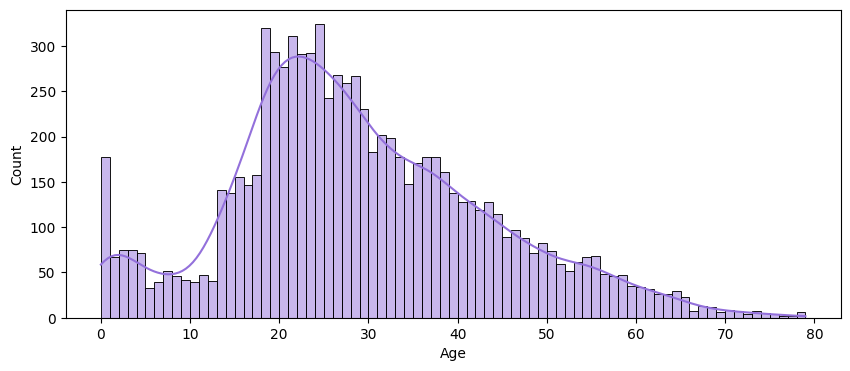

In [197]:
plt.figure(figsize = (10,4))

#plot using seaborn
sns.histplot(data=data, x='Age', binwidth=1, kde=True, color='mediumpurple')

RoomService: The amount of money that tha passenger spent for RoomService  

<Axes: xlabel='RoomService', ylabel='Count'>

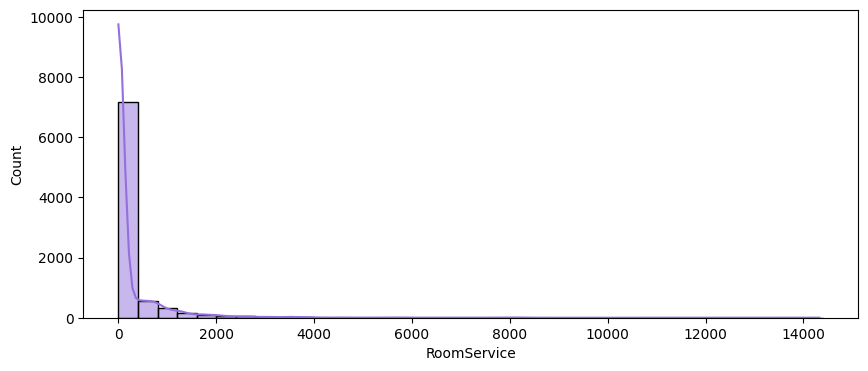

In [198]:
plt.figure(figsize = (10,4))

#plot using seaborn
sns.histplot(data=data, x='RoomService', binwidth=400, kde=True, color='mediumpurple')

FoodCourt: The amount of money that tha passenger spent for FoodCourt  

<Axes: xlabel='FoodCourt', ylabel='Count'>

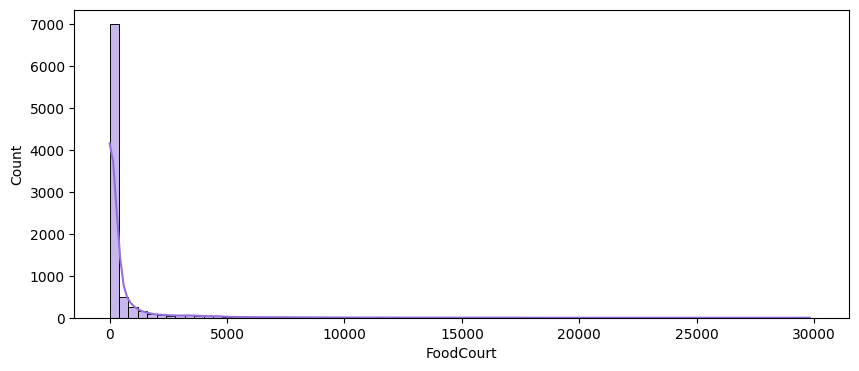

In [199]:
plt.figure(figsize = (10,4))

#plot using seaborn
sns.histplot(data=data, x='FoodCourt', binwidth=400, kde=True, color='mediumpurple')

ShoppingMall: The amount of money that tha passenger spent for ShoppingMall  

<Axes: xlabel='ShoppingMall', ylabel='Count'>

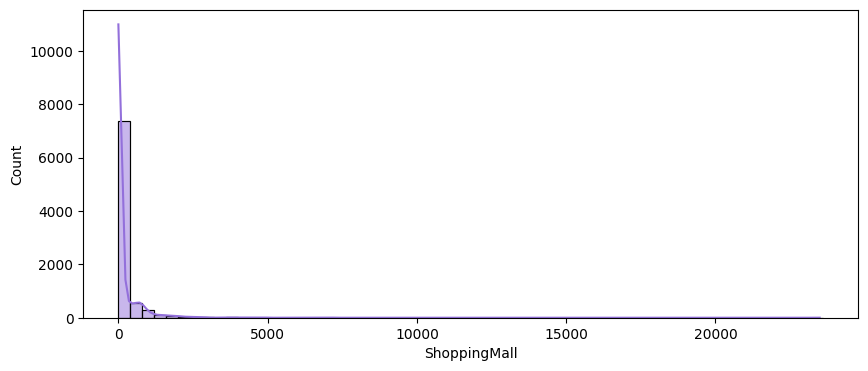

In [200]:
plt.figure(figsize = (10,4))

#plot using seaborn
sns.histplot(data=data, x='ShoppingMall', binwidth=400, kde=True, color='mediumpurple')

Spa: The amount of money that tha passenger spent for Spa  

<Axes: xlabel='Spa', ylabel='Count'>

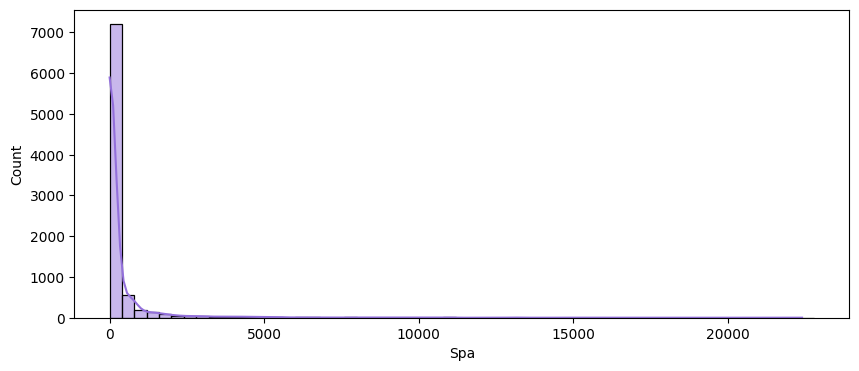

In [201]:
plt.figure(figsize = (10,4))

#plot using seaborn
sns.histplot(data=data, x='Spa', binwidth=400, kde=True, color='mediumpurple')

VRDeck: The amount of money that tha passenger spent for VRDeck  

<Axes: xlabel='VRDeck', ylabel='Count'>

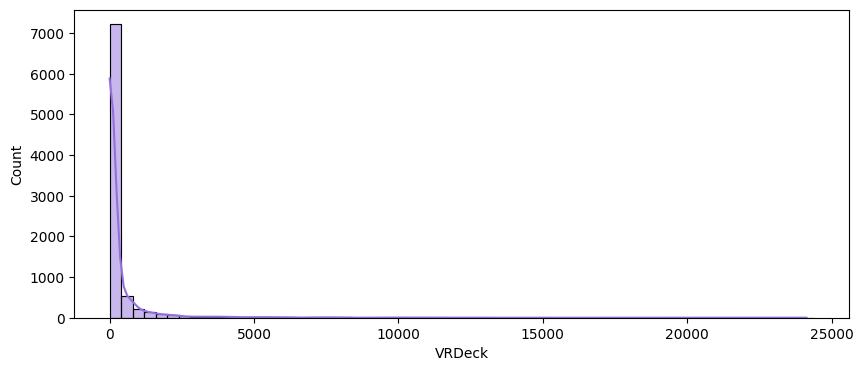

In [202]:
plt.figure(figsize = (10,4))

#plot using seaborn
sns.histplot(data=data, x='VRDeck', binwidth=400, kde=True, color='mediumpurple')

As we can clearly see, those features have the same distribution. 
From those plots we cannot say that the same group of people has spent the money in all the categories, but for the porpouse of this analysis we just care about the fact that those people have spent money.

to verify that we try to clusterize those features and see if there are results

In [203]:
services_features =['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [204]:
services = data[services_features]
services.head()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.0,0.0,0.0,0.0,0.0
1,109.0,9.0,25.0,549.0,44.0
2,43.0,3576.0,0.0,6715.0,49.0
3,0.0,1283.0,371.0,3329.0,193.0
4,303.0,70.0,151.0,565.0,2.0


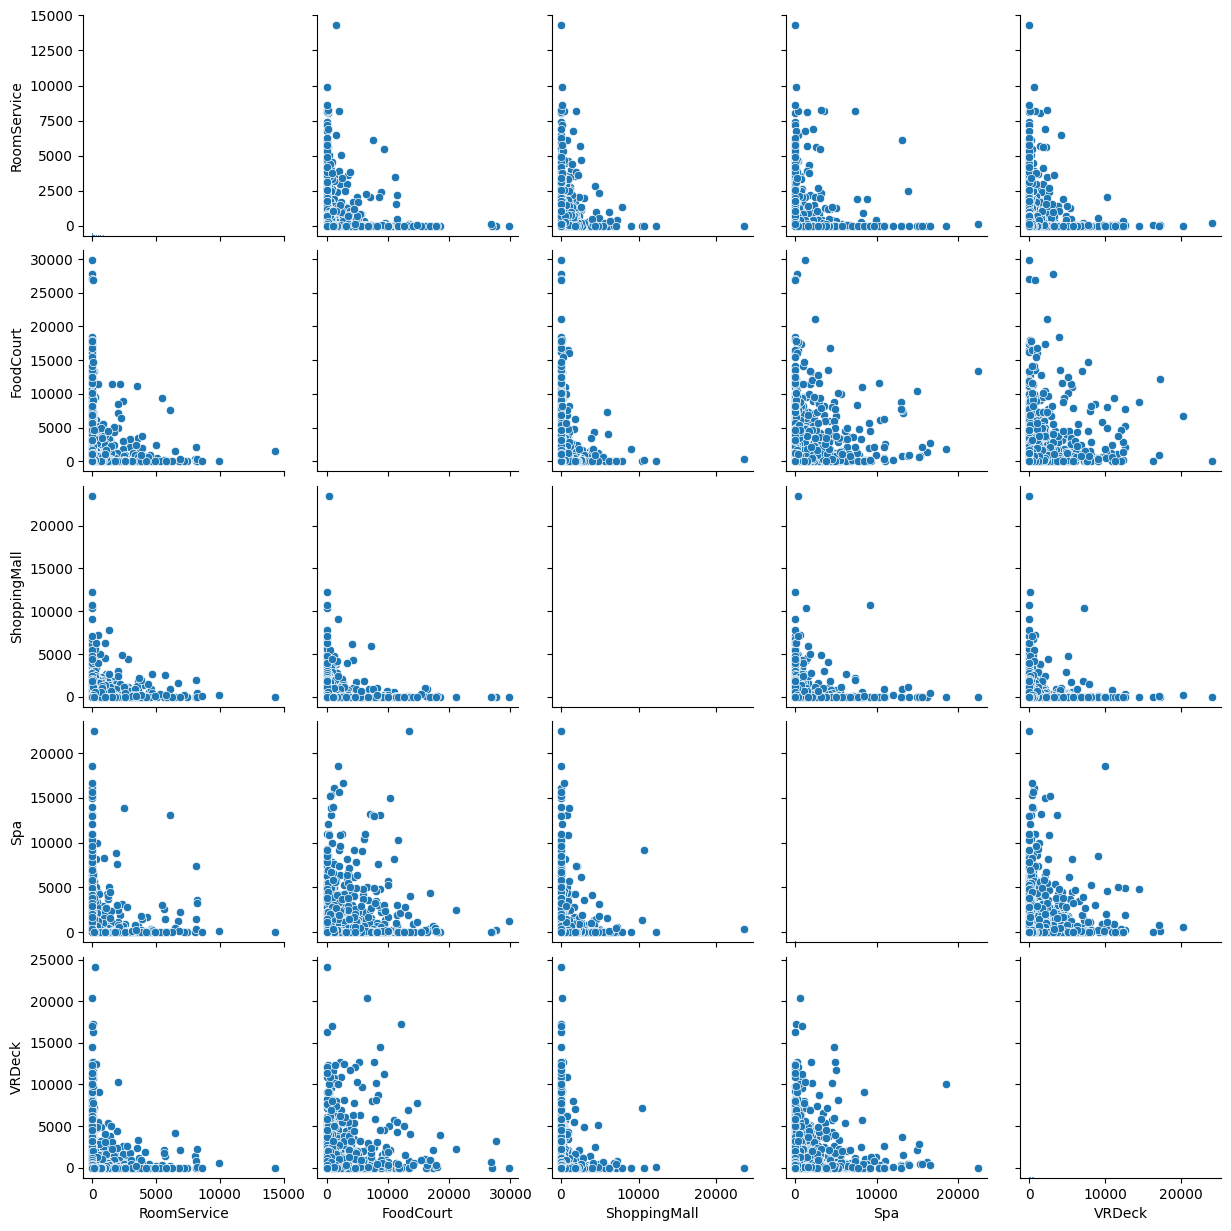

In [205]:
sns.pairplot(data=services)

## Categorical Features

In [206]:
cat_features


['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'VIP',
 'Name',
 'Transported']

* **PassengerId** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

* **Name** - The first and last names of the passenger.

PassengerID

In [207]:
np.linspace(0.5,7.5,8)

array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5])

[1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 3, 4, 5, 6, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 2, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 2, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 2, 1, 2, 3, 1, 1, 2, 1, 2, 1, 1, 1, 2, 3, 1, 1, 1, 2, 3, 1, 2, 3, 4, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 3, 1, 2, 1, 1, 1, 1, 1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 4, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 

Text(0.5, 1.0, 'Group distribution')

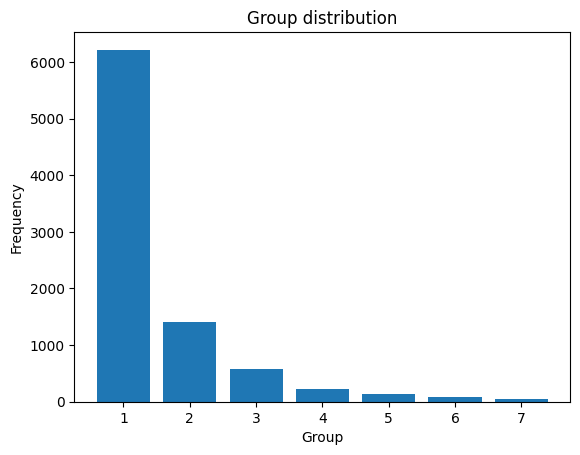

In [208]:
#separate the gruop and the id in the group
gruop, id_group = [],[]
for pID in data['PassengerId']:
    gruop.append(int(pID[0:4]))
    id_group.append(int(pID[5:7]))

fres, bins = np.histogram(id_group, np.linspace(0.5,7.5,8))
bins = [1,2,3,4,5,6,7]
print(id_group)
plt.bar(bins,fres)
plt.xlabel('Group')
plt.ylabel('Frequency')
plt.title('Group distribution')

<Figure size 1000x400 with 0 Axes>

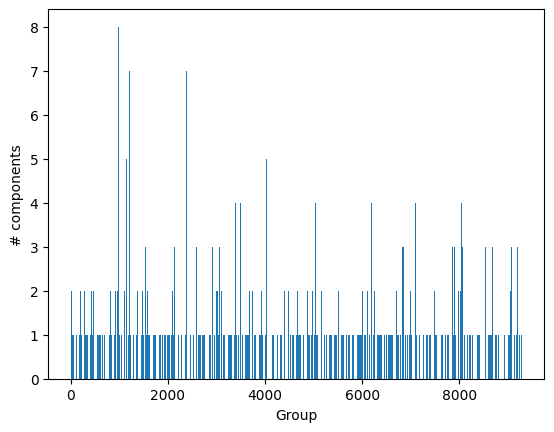

<Figure size 1000x400 with 0 Axes>

In [209]:
unique, counts = np.unique(gruop, return_counts=True)
plt.bar(unique,counts)
plt.xlabel('Group')
plt.ylabel('# components')

plt.figure(figsize = (10,4))


Cabin

* **Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

In [210]:
data['Cabin']

0          B/0/P
1          F/0/S
2          A/0/S
3          A/0/S
4          F/1/S
          ...   
8688      A/98/P
8689    G/1499/S
8690    G/1500/S
8691     E/608/S
8692     E/608/S
Name: Cabin, Length: 8693, dtype: object

In [211]:
type(data["Cabin"][15])

float

In [212]:
trys = 'E/608/S'
trys = trys.split('/')
trys

['E', '608', 'S']

In [213]:
cabin_dict = {
    'Deck': [],
    'Num': [],
    'Side': []
}
for c in data["Cabin"]:
    #split c by /
    if type(c) == float:
        continue
    c = c.split('/')
    for i,let in enumerate('ABCDEFGT'):
        if c[0] == let:
            cabin_dict['Deck'].append(i)

    # cabin_dict['Deck'].append(c[0])
    cabin_dict['Num'].append(int(c[1]))

    for i,let in enumerate('SP'):
        if c[2] == let:
            cabin_dict['Side'].append(i)

print(cabin_dict)

{'Deck': [1, 5, 0, 0, 5, 5, 5, 6, 5, 1, 1, 1, 5, 6, 5, 5, 5, 5, 6, 5, 4, 4, 4, 4, 4, 4, 3, 2, 5, 2, 5, 6, 5, 5, 5, 3, 3, 5, 5, 6, 6, 1, 6, 6, 6, 5, 5, 4, 4, 6, 5, 0, 0, 0, 6, 5, 5, 5, 4, 6, 6, 6, 5, 4, 5, 5, 5, 5, 3, 2, 5, 5, 2, 6, 5, 5, 5, 6, 2, 5, 4, 6, 6, 5, 6, 6, 6, 0, 6, 6, 5, 6, 5, 5, 6, 6, 5, 3, 6, 6, 6, 1, 1, 1, 4, 1, 5, 6, 5, 3, 0, 0, 5, 6, 5, 5, 4, 3, 4, 6, 5, 3, 6, 6, 6, 4, 2, 6, 5, 5, 5, 6, 6, 5, 6, 6, 5, 6, 1, 1, 6, 6, 5, 5, 5, 6, 4, 6, 6, 4, 5, 1, 3, 6, 6, 6, 6, 2, 5, 6, 6, 4, 6, 6, 6, 6, 5, 5, 5, 5, 3, 2, 6, 6, 6, 1, 1, 1, 0, 2, 6, 2, 6, 3, 5, 5, 5, 4, 5, 5, 5, 5, 6, 6, 6, 6, 4, 5, 6, 6, 4, 4, 4, 4, 4, 4, 4, 5, 5, 4, 6, 5, 6, 5, 5, 6, 5, 5, 1, 5, 4, 5, 6, 5, 2, 2, 3, 2, 6, 2, 5, 6, 5, 0, 5, 5, 5, 4, 5, 6, 3, 5, 5, 5, 3, 5, 6, 5, 5, 6, 5, 4, 4, 5, 1, 5, 2, 1, 1, 1, 1, 3, 1, 6, 0, 5, 6, 4, 2, 4, 5, 5, 5, 6, 5, 6, 6, 6, 1, 1, 6, 6, 5, 6, 6, 6, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 6, 1, 6, 5, 4, 6, 5, 3, 6, 5, 1, 5, 6, 6, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5, 6, 4, 6, 2, 1, 1, 1, 1, 1, 1, 

In [214]:
color = [] 
for sid in cabin_dict['Side']:
    if sid == 'S':
        color.append('red')
    if sid == 'P':
        color.append('blue')



In [215]:
pd.DataFrame.from_dict(cabin_dict)

,Deck,Num,Side
0,1,0,1
1,5,0,0
2,0,0,0
3,0,0,0
4,5,1,0
...,...,...,...
8489,0,98,1
8490,6,1499,0
8491,6,1500,0
8492,4,608,0


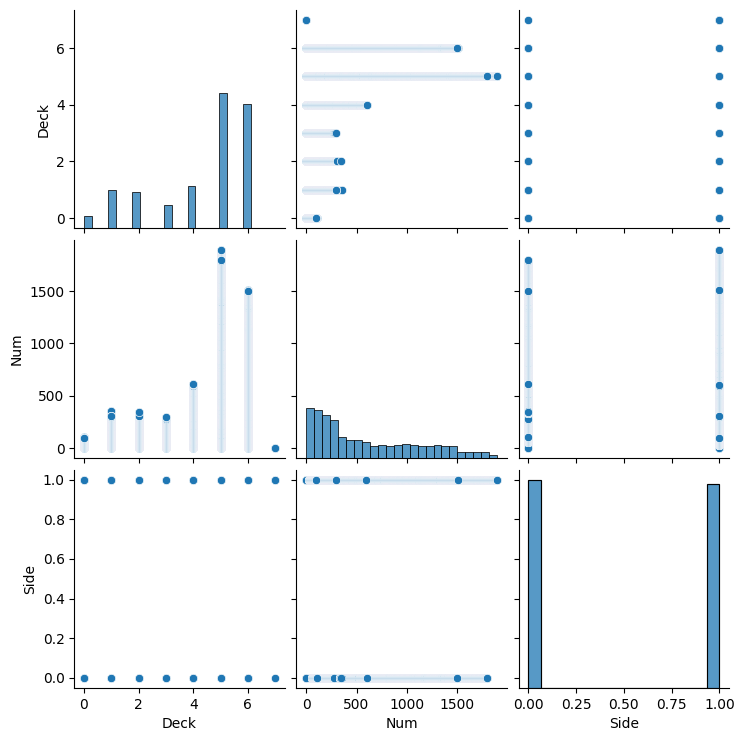

In [216]:
#plot all the features of the cabin_dict
sns.pairplot(data=pd.DataFrame.from_dict(cabin_dict))

* **HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.

<Axes: xlabel='HomePlanet', ylabel='count'>

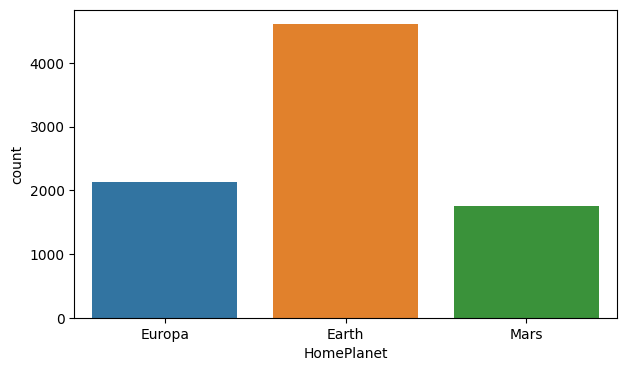

In [217]:
fig=plt.figure(figsize=(7,4))

sns.countplot(data=data, x='HomePlanet')


 * **CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

<Axes: xlabel='CryoSleep', ylabel='count'>

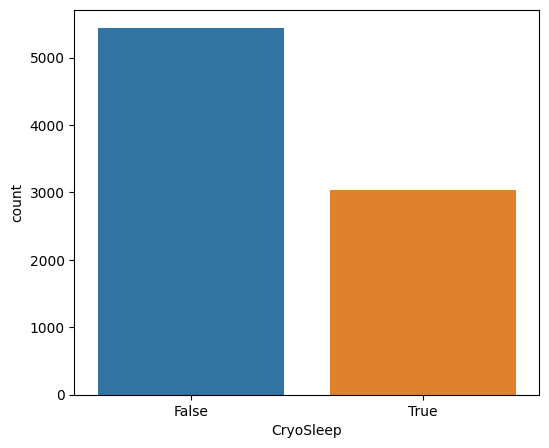

In [218]:
fig=plt.figure(figsize=(6,5))

sns.countplot(data=data, x='CryoSleep')


* **Destination** - The planet the passenger will be debarking to.

<Axes: xlabel='Destination', ylabel='count'>

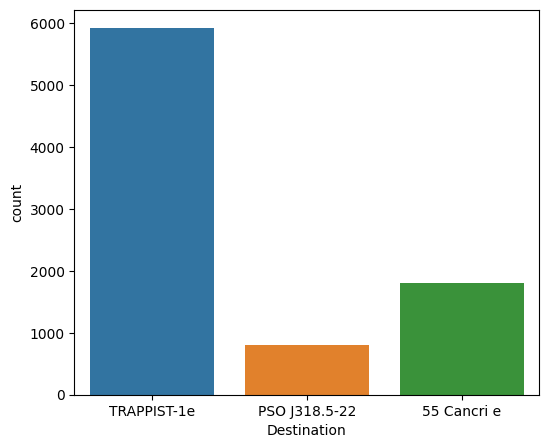

In [219]:
fig=plt.figure(figsize=(6,5))

sns.countplot(data=data, x='Destination')


 * **VIP** - Whether the passenger has paid for special VIP service during the voyage.

<Axes: xlabel='VIP', ylabel='count'>

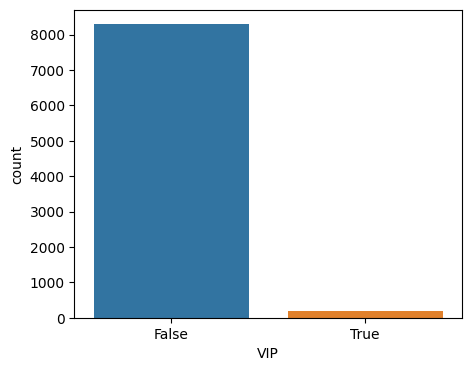

In [220]:
fig=plt.figure(figsize=(5,4))

sns.countplot(data=data, x='VIP')


# Missing Values

In [221]:
data.isna().any()

PassengerId     False
HomePlanet       True
CryoSleep        True
Cabin            True
Destination      True
Age              True
VIP              True
RoomService      True
FoodCourt        True
ShoppingMall     True
Spa              True
VRDeck           True
Name             True
Transported     False
dtype: bool

In [222]:
# Columns with missing values
na_cols=data.columns[data.isna().any()].tolist()

# Missing values summary
mv=pd.DataFrame(data[na_cols].isna().sum(), columns=['Number_missing'])
mv['Percentage_missing']=np.round(100*mv['Number_missing']/len(data),2)
mv

,Number_missing,Percentage_missing
HomePlanet,201,2.31
CryoSleep,217,2.50
Cabin,199,2.29
Destination,182,2.09
Age,179,2.06
VIP,203,2.34
RoomService,181,2.08
FoodCourt,183,2.11
ShoppingMall,208,2.39
Spa,183,2.11


WE cannot seimply delete the missing values because we will lose a lot of data.

In [223]:
data[na_cols].isna()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,False,False,False,False,False,False,False,False,False,False,False
8689,False,False,False,False,False,False,False,False,False,False,False,False
8690,False,False,False,False,False,False,False,False,False,False,False,False
8691,False,False,False,False,False,False,False,False,False,False,False,False


In [224]:
# # Heatmap of missing values
# plt.figure(figsize=(12,6))
# sns.heatmap(data[na_cols].isna().T)

In [225]:
#Count the number of Missing values for each passenger
for p in range(len(data['Cabin'])):
    count = 0
    for feat in data.iloc[p]:
        if type(feat) == float:
            count=count+1
        if count == 3:
            print(p)
            break    

5208
5806
6057


A passenger has 13 features. Since we saw that the maximum number of missing feature for a single passanger is 3 the percentage of missing feature is relatively low. So we choose not to eliminate entrances but instead fill the missing values. 


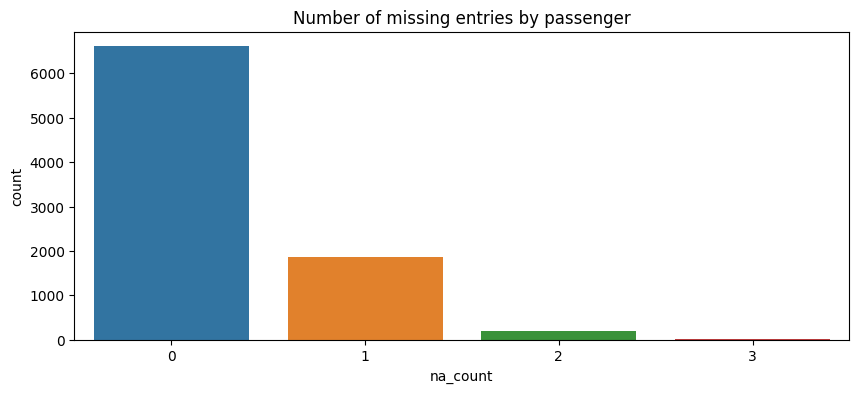

In [226]:
# Countplot of number of missing values by passenger
data['na_count']=data.isna().sum(axis=1)
plt.figure(figsize=(10,4))
sns.countplot(data=data, x='na_count')
plt.title('Number of missing entries by passenger')
data.drop('na_count', axis=1, inplace=True)

## Fill missing values

We will use here the median for the numerical feature and then the mode for categorical ones.

In [227]:
data.isna().sum(axis=0)

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

Numerical Data

In [228]:
data[num_features].median()

Age             27.0
RoomService      0.0
FoodCourt        0.0
ShoppingMall     0.0
Spa              0.0
VRDeck           0.0
dtype: float64

In [229]:
data = pd.read_csv('spaceship-titanic/train.csv')

In [230]:
# Impute median (for continuous data)
data['Age'].fillna(data['Age'].median(), inplace=True)
data['RoomService'].fillna(data['RoomService'].median(), inplace=True)
data['FoodCourt'].fillna(data['FoodCourt'].median(), inplace=True)
data['ShoppingMall'].fillna(data['ShoppingMall'].median(), inplace=True)
data['Spa'].fillna(data['Spa'].median(), inplace=True)
data['VRDeck'].fillna(data['VRDeck'].median(), inplace=True)

Catetorical Data

In [231]:
# Find mode of each categorical feature
data[['HomePlanet','CryoSleep','Destination','VIP']].mode()

,HomePlanet,CryoSleep,Destination,VIP
0,Earth,False,TRAPPIST-1e,False


In [232]:
# Impute most frequent category (for categorical data)
data['HomePlanet'].fillna('Earth', inplace=True)
data['CryoSleep'].fillna(False, inplace=True)
data['Destination'].fillna('TRAPPIST-1e', inplace=True)
data['VIP'].fillna(False, inplace=True)

Qualitative Data

<html>
<body>

<p> <font color="red"> <b> La cabina non è stata fillat peerchè è un problema, ci sta lavorando angelo </b> </font> </p>




In [233]:
# data['Cabin'].mode()

In [234]:
# # Impute outliers (for qualitative data)
# data['Cabin'].fillna('G/734/S', inplace=True)
data['Name'].fillna('No Name', inplace=True)


In [235]:
data.isna().sum(axis=0)

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name              0
Transported       0
dtype: int64

Numerical Data

# Preprocessing

Drop the features that we don't need

In [236]:
# Drop qualitative/redundant/collinear/high cardinality features
data.drop(['PassengerId', 'Cabin', 'Name', 'Transported'], axis=1, inplace=True)
data

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0


# Normalization

**Min-Max Normalization**

In [237]:
#Normalize the numerical features using MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[num_features] = scaler.fit_transform(data[num_features])
data[num_features]

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.711945,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003
1,-0.334037,-0.168073,-0.275387,-0.241771,0.217158,-0.224205
2,2.036857,-0.268001,1.959998,-0.283579,5.695623,-0.219796
3,0.293552,-0.333105,0.523010,0.336851,2.687176,-0.092818
4,-0.891895,0.125652,-0.237159,-0.031059,0.231374,-0.261240
...,...,...,...,...,...,...
8688,0.851410,-0.333105,3.992336,-0.283579,1.189173,-0.197751
8689,-0.752431,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003
8690,-0.194573,-0.333105,-0.281027,2.846999,-0.269737,-0.263003
8691,0.223820,-0.333105,0.376365,-0.283579,0.043013,2.589576


In [260]:
minus_room_service = []
for i in num_features:
    if i == 'RoomService':
        continue
    minus_room_service.append(i)

minus_room_service

['Age', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [272]:
# PCA over the numerical features with 3 components
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(data[minus_room_service])
total_var = pca.explained_variance_ratio_.sum() * 100

In [274]:
import plotly.express as px
fig = px.scatter(
    components, x=0, y=1,color = label, size=0.1*np.ones(len(data[minus_room_service])), opacity = 0.5,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'},
    width=800, height=500
)
fig.show()

In [241]:
import plotly.express as px
fig = px.scatter(
    components, x=0, y=1,color = label, size=0.1*np.ones(len(data[num_features])), opacity = 0.5,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2'},
    width=800, height=500
)
fig.show()

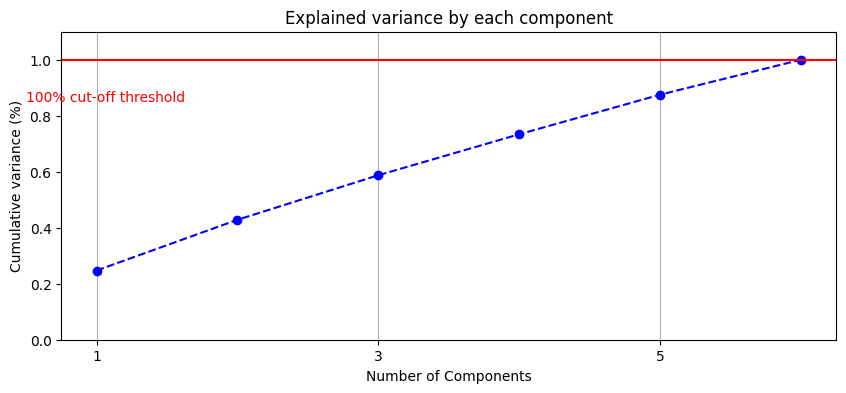

In [242]:
# Explained variance (how important each additional principal component is)
pca = PCA().fit(data[num_features])
fig, ax = plt.subplots(figsize=(10,4))
xi = np.arange(1, 1+data[num_features].shape[1], step=1)
yi = np.cumsum(pca.explained_variance_ratio_)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

# Aesthetics
plt.ylim(0.0,1.1)
plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 1+data[num_features].shape[1], step=2))
plt.ylabel('Cumulative variance (%)')
plt.title('Explained variance by each component')
plt.axhline(y=1, color='r', linestyle='-')
plt.text(0.5, 0.85, '100% cut-off threshold', color = 'red')
ax.grid(axis='x')

In [243]:
num_features

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [244]:
#one hot encode the categorical features

data_encoded = pd.get_dummies(data, columns=['HomePlanet','CryoSleep','Destination','VIP'])
# by doing this we are creating a new column for each category of the categorical feature
data_encoded


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
0,0.711945,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,0,1,0,1,0,0,0,1,1,0
1,-0.334037,-0.168073,-0.275387,-0.241771,0.217158,-0.224205,1,0,0,1,0,0,0,1,1,0
2,2.036857,-0.268001,1.959998,-0.283579,5.695623,-0.219796,0,1,0,1,0,0,0,1,0,1
3,0.293552,-0.333105,0.523010,0.336851,2.687176,-0.092818,0,1,0,1,0,0,0,1,1,0
4,-0.891895,0.125652,-0.237159,-0.031059,0.231374,-0.261240,1,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.851410,-0.333105,3.992336,-0.283579,1.189173,-0.197751,0,1,0,1,0,1,0,0,0,1
8689,-0.752431,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,1,0,0,0,1,0,1,0,1,0
8690,-0.194573,-0.333105,-0.281027,2.846999,-0.269737,-0.263003,1,0,0,1,0,0,0,1,1,0
8691,0.223820,-0.333105,0.376365,-0.283579,0.043013,2.589576,0,1,0,1,0,1,0,0,1,0


In [245]:
#pca over the encoded data
pca = PCA(n_components=2)
components = pca.fit_transform(data_encoded)
total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter(
    components, x=0, y=1,color = label, size=0.1*np.ones(len(data_encoded)), opacity = 0.5,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2'},
    width=800, height=500
)
fig.show()